<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predictive-Modeling" data-toc-modified-id="Predictive-Modeling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predictive Modeling</a></span><ul class="toc-item"><li><span><a href="#Helper-Functions" data-toc-modified-id="Helper-Functions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Helper Functions</a></span></li><li><span><a href="#Classification-models" data-toc-modified-id="Classification-models-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Classification models</a></span></li><li><span><a href="#Train/Test-split-with-undersampling" data-toc-modified-id="Train/Test-split-with-undersampling-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Train/Test split with undersampling</a></span></li><li><span><a href="#XGBoost-Classifier" data-toc-modified-id="XGBoost-Classifier-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>XGBoost Classifier</a></span></li><li><span><a href="#AdaBoost-Classifier" data-toc-modified-id="AdaBoost-Classifier-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>AdaBoost Classifier</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Gaussian-Naive-Bayes-Classsifier" data-toc-modified-id="Gaussian-Naive-Bayes-Classsifier-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Gaussian Naive Bayes Classsifier</a></span></li><li><span><a href="#RandomForest-Classifier" data-toc-modified-id="RandomForest-Classifier-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>RandomForest Classifier</a></span></li><li><span><a href="#RandomForest-Classifier-with-RandomizedGridSearch-Cross-Validation" data-toc-modified-id="RandomForest-Classifier-with-RandomizedGridSearch-Cross-Validation-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>RandomForest Classifier with RandomizedGridSearch Cross-Validation</a></span></li><li><span><a href="#Cross-Valiadation" data-toc-modified-id="Cross-Valiadation-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Cross Valiadation</a></span></li></ul></li></ul></div>

# Predictive Modeling


In [24]:
# importing packages

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn import decomposition
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection, preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
sns.set()

## Helper Functions

In [25]:

def evaluate_model(predictions, probs, train_predictions, train_probs, title,a):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline', linewidth=3)
    plt.plot(model_fpr, model_tpr, 'r', label = 'model', linewidth=3)
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves ' + title);
    plt.savefig(a, dpi=500);


In [26]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:10]]
    values = importances[indices][:10]

    # Creat the plot
    fig = plt.figure(figsize = (12,8))
    plt.title("Normalized Weights for First Ten Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(10), values, width = 0.6, align="center", color = '#3296c8', \
          label = "Feature Weight") #'#00A000'
    plt.bar(np.arange(10) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#c8dcb4', \
          label = "Cumulative Feature Weight")  #'#0AA0A0' '#96c896'
    plt.xticks(np.arange(10), columns, rotation=45)
    plt.xlim((-0.5, 9.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.savefig('ROC_XGB.png', dpi=500)
    plt.show()

In [27]:
# helper function for polynomial regression

def create_polynomial_regression_model(degree):
    "Creates a polynomial regression model for the given degree"
    
    poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
    r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    r2_test = r2_score(Y_test, y_test_predict)
    
    #print("The model performance for the training set")
    #print("-------------------------------------------")
    #print("RMSE of training set is {}".format(rmse_train))
    #print("R2 score of training set is {}".format(r2_train))
  
    #print("\n")
  
    #print("The model performance for the test set")
    #print("------------------------------------------")
    #print("RMSE of test set is {}".format(rmse_test))
    #print("R2 score of test set is {}".format(r2_test))
    


In [34]:
## load cleaned weather data

df = pd.read_csv('weather_data_cleaned.csv', index_col='MESS_DATUM', parse_dates=True)
df = df.iloc[:,1:]
df.head()

,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT,R1,TT_TU,RF_TU,TD,V_N,P,FF,DD,V_TE005,V_TE010,V_TE020,V_TE050,V_TE100,V_VV
MESS_DATUM,,,,,,,,,,,,,,,,,,,
2005-01-01 00:00:00,120.0,0.0,0.0,0.0,148.86,0.0,4.7,95.0,4.0,7.0,1020.2,2.2,350.0,5.6,5.5,5.2,4.6,5.2,2000.0
2005-01-01 01:00:00,100.0,0.0,0.0,0.0,144.98,0.1,4.3,95.0,3.6,7.0,1020.5,1.5,310.0,5.3,5.4,5.2,4.6,5.1,3500.0
2005-01-01 02:00:00,89.0,0.0,0.0,0.0,138.39,0.0,3.1,96.0,2.5,2.0,1021.3,1.5,280.0,4.7,5.1,5.1,4.6,5.1,800.0
2005-01-01 06:00:00,113.0,0.0,0.0,0.0,104.08,0.0,2.0,98.0,1.7,8.0,1022.0,2.3,220.0,3.7,4.2,4.7,4.8,5.2,3500.0
2005-01-01 07:00:00,114.0,0.0,0.0,0.0,96.06,0.0,2.7,100.0,2.7,7.0,1021.8,2.8,210.0,3.6,4.0,4.5,4.7,5.2,4500.0


## Classification models

In [35]:
## prepare dataset for classification by replacing precipitation values >0 mm with ones

df2_R1 = df.R1.where(df.R1 == 0, 1)
df2_R1 = pd.DataFrame(df2_R1)
df2 = df.drop(columns='R1')
df2 = pd.concat([df2_R1,df2],axis=1)
df2.head()

,R1,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT,TT_TU,RF_TU,TD,V_N,P,FF,DD,V_TE005,V_TE010,V_TE020,V_TE050,V_TE100,V_VV
MESS_DATUM,,,,,,,,,,,,,,,,,,,
2005-01-01 00:00:00,0.0,120.0,0.0,0.0,0.0,148.86,4.7,95.0,4.0,7.0,1020.2,2.2,350.0,5.6,5.5,5.2,4.6,5.2,2000.0
2005-01-01 01:00:00,1.0,100.0,0.0,0.0,0.0,144.98,4.3,95.0,3.6,7.0,1020.5,1.5,310.0,5.3,5.4,5.2,4.6,5.1,3500.0
2005-01-01 02:00:00,0.0,89.0,0.0,0.0,0.0,138.39,3.1,96.0,2.5,2.0,1021.3,1.5,280.0,4.7,5.1,5.1,4.6,5.1,800.0
2005-01-01 06:00:00,0.0,113.0,0.0,0.0,0.0,104.08,2.0,98.0,1.7,8.0,1022.0,2.3,220.0,3.7,4.2,4.7,4.8,5.2,3500.0
2005-01-01 07:00:00,0.0,114.0,0.0,0.0,0.0,96.06,2.7,100.0,2.7,7.0,1021.8,2.8,210.0,3.6,4.0,4.5,4.7,5.2,4500.0


## Train/Test split with undersampling

In [94]:
y = df2.R1
x = df2.drop(columns='R1')

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

# run random under sampler with choosen sampling_strategy (1 = 50%/50%)
#RUS = RandomUnderSampler(random_state=10)
#x_train, y_train = RUS.fit_resample(x_train, y_train)
#y_train = pd.DataFrame(y_train, columns=['R1'])
#x_train = pd.DataFrame(x_train, columns=x.columns)


## XGBoost Classifier

In [95]:
t = time.time()
model = XGBClassifier(n_estimators=1000,learning_rate=0.6)
model.fit(x_train, y_train)
y_pred_xgb=model.predict(x_test)
elapsed = time.time() - t
elapsed

75.91969203948975

In [96]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     28585
         1.0       0.73      0.60      0.66      3810

    accuracy                           0.93     32395
   macro avg       0.84      0.79      0.81     32395
weighted avg       0.92      0.93      0.92     32395



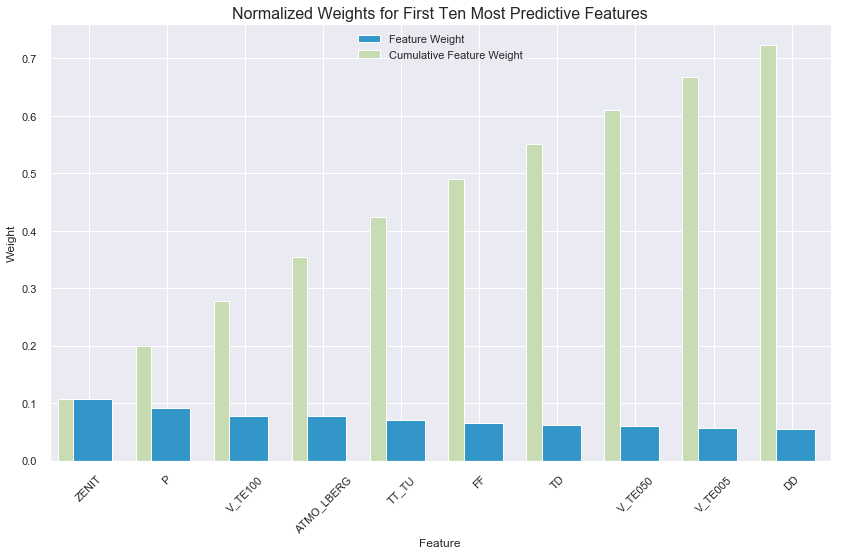

In [97]:
# Extract the feature importances
importances = model.feature_importances_

# Plot
feature_plot(importances, x_train, y_train)

Recall Baseline: 1.0 Test: 0.6 Train: 0.81
Precision Baseline: 0.12 Test: 0.73 Train: 0.91
Roc Baseline: 0.5 Test: 0.95 Train: 0.99


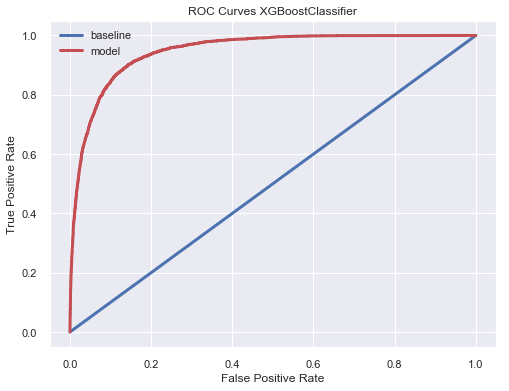

In [98]:
# Make probability predictions
train_probs = model.predict_proba(x_train)[:, 1]
probs = model.predict_proba(x_test)[:, 1]

train_predictions = model.predict(x_train)
predictions = model.predict(x_test)

train_labels = y_train.copy()
test_labels = y_test.copy()

evaluate_model(predictions, probs, train_predictions, train_probs,'XGBoostClassifier', 'Images/Prec_XGB.png')

In [99]:
from sklearn.metrics import roc_auc_score

train_probs = model.predict_proba(x_train)[:, 1]

roc_auc_score(y_train, train_probs)

0.9895832219106289

In [102]:
(27747+2302)/(27747+2302+838+1508)

0.9275814168853218

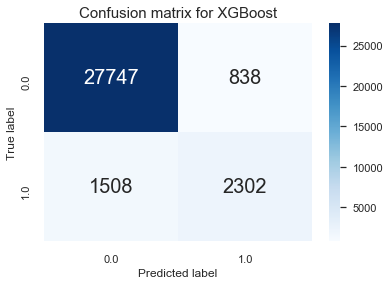

In [100]:
confusion_matrix = pd.crosstab(y_test, y_pred_xgb, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,annot_kws={'size': 20},fmt='g',cmap='Blues');

plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.title('Confusion matrix for XGBoost', fontsize=15);
plt.savefig('Images/Prec_XGB_matrix.png',dpi=500)

## AdaBoost Classifier

In [113]:
t = time.time()
ada = AdaBoostClassifier(n_estimators=1000,learning_rate=0.5)
ada.fit(x_train, y_train)
y_pred_ada=model.predict(x_test)
elapsed = time.time() - t
elapsed

95.0766441822052

In [114]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     28585
         1.0       0.73      0.60      0.66      3810

    accuracy                           0.93     32395
   macro avg       0.84      0.79      0.81     32395
weighted avg       0.92      0.93      0.92     32395



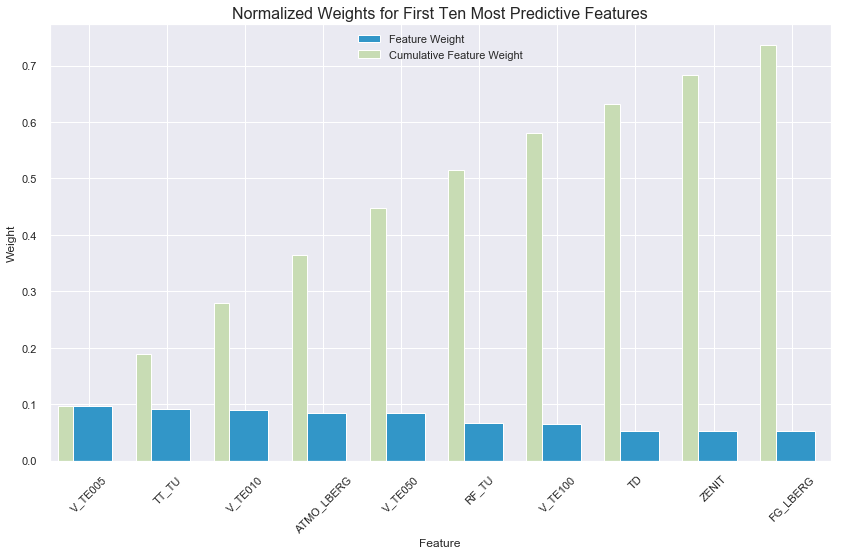

In [115]:
# Extract the feature importances
importances = ada.feature_importances_

# Plot
feature_plot(importances, x_train, y_train)

Recall Baseline: 1.0 Test: 0.45 Train: 0.45
Precision Baseline: 0.12 Test: 0.7 Train: 0.69
Roc Baseline: 0.5 Test: 0.93 Train: 0.93


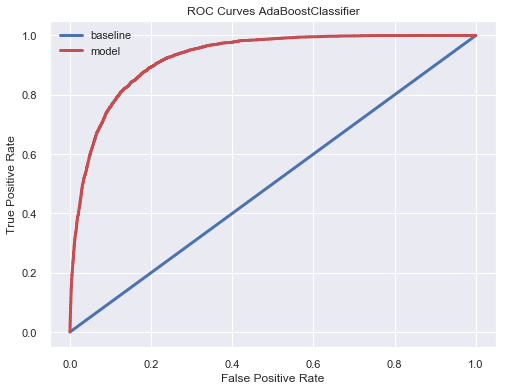

In [108]:
# Make probability predictions
train_probs = ada.predict_proba(x_train)[:, 1]
probs = ada.predict_proba(x_test)[:, 1]

train_predictions = ada.predict(x_train)
predictions = ada.predict(x_test)

train_labels = y_train.copy()
test_labels = y_test.copy()

evaluate_model(predictions, probs, train_predictions, train_probs,'AdaBoostClassifier', 'Images/Prec_ADA.png')

In [116]:
## ROC score
roc_auc_score(y_train, train_probs)

0.9304378249159713

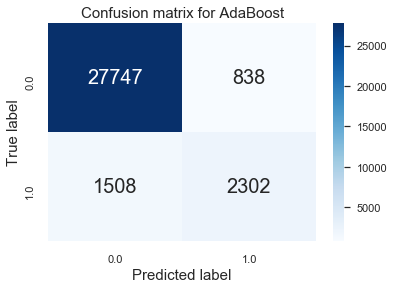

In [117]:
confusion_matrix = pd.crosstab(y_test, y_pred_ada, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,annot_kws={'size': 20},fmt='g',cmap='Blues');

plt.ylabel('True label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)
plt.title('Confusion matrix for AdaBoost', fontsize=15);
plt.savefig('Images/Prec_ADA_matrix.png',dpi=500)

In [111]:
(27747+2302)/(27747+2302+1508+838)

0.9275814168853218

## Logistic Regression

In [264]:
t = time.time()

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_log=lr.predict(x_test)
elapsed = time.time() - t
elapsed

//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.6240668296813965

In [265]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     29690
         1.0       0.69      0.35      0.46      3920

    accuracy                           0.91     33610
   macro avg       0.80      0.66      0.71     33610
weighted avg       0.89      0.91      0.89     33610



Recall Baseline: 1.0 Test: 0.35 Train: 0.34
Precision Baseline: 0.12 Test: 0.69 Train: 0.67
Roc Baseline: 0.5 Test: 0.91 Train: 0.91


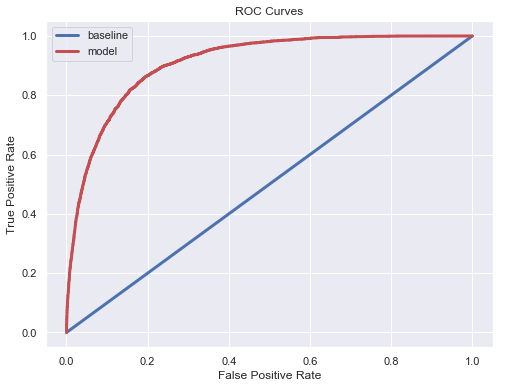

In [268]:
# Make probability predictions
train_probs = lr.predict_proba(x_train)[:, 1]
probs = lr.predict_proba(x_test)[:, 1]

train_predictions = lr.predict(x_train)
predictions = lr.predict(x_test)

train_labels = y_train.copy()
test_labels = y_test.copy()

evaluate_model(predictions, probs, train_predictions, train_probs)

In [269]:
## ROC score
roc_auc_score(y_test, probs)

0.9102339222991319

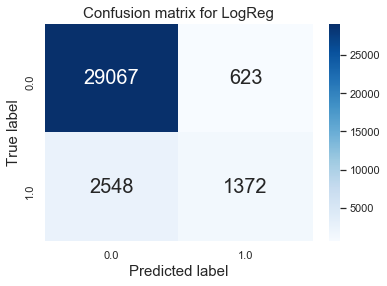

In [270]:
confusion_matrix = pd.crosstab(y_test, y_pred_log, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,annot_kws={'size': 20},fmt='g',cmap='Blues');

plt.ylabel('True label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)
plt.title('Confusion matrix for LogReg', fontsize=15);

## Gaussian Naive Bayes Classsifier

In [16]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
t = time.time()
y_pred_gnb = gnb.fit(x_train, y_train).predict(x_test)

elapsed = time.time() - t
elapsed

0.05295586585998535

In [17]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

         0.0       0.98      0.67      0.79     29690
         1.0       0.26      0.88      0.40      3920

    accuracy                           0.69     33610
   macro avg       0.62      0.77      0.60     33610
weighted avg       0.89      0.69      0.75     33610



Recall Baseline: 1.0 Test: 0.88 Train: 0.88
Precision Baseline: 0.12 Test: 0.26 Train: 0.25
Roc Baseline: 0.5 Test: 0.86 Train: 0.86


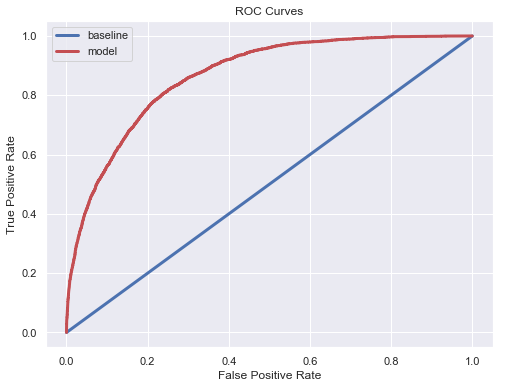

In [18]:
# Make probability predictions
train_probs = gnb.predict_proba(x_train)[:, 1]
probs = gnb.predict_proba(x_test)[:, 1]

train_predictions = gnb.predict(x_train)
predictions = gnb.predict(x_test)

train_labels = y_train.copy()
test_labels = y_test.copy()

evaluate_model(predictions, probs, train_predictions, train_probs)

In [19]:
## ROC score
roc_auc_score(y_test, probs)

0.8648143228325348

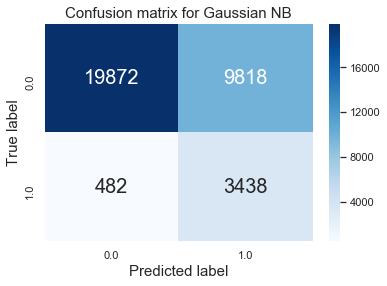

In [21]:
confusion_matrix = pd.crosstab(y_test, y_pred_gnb, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,annot_kws={'size': 20},fmt='g',cmap='Blues');

plt.ylabel('True label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)
plt.title('Confusion matrix for Gaussian NB', fontsize=15);

## RandomForest Classifier

In [118]:
t = time.time()
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train, y_train)
y_pred_rf=rf.predict(x_test)
elapsed = time.time() - t
elapsed

173.68526792526245

In [119]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     28585
         1.0       0.81      0.54      0.65      3810

    accuracy                           0.93     32395
   macro avg       0.87      0.76      0.80     32395
weighted avg       0.93      0.93      0.92     32395



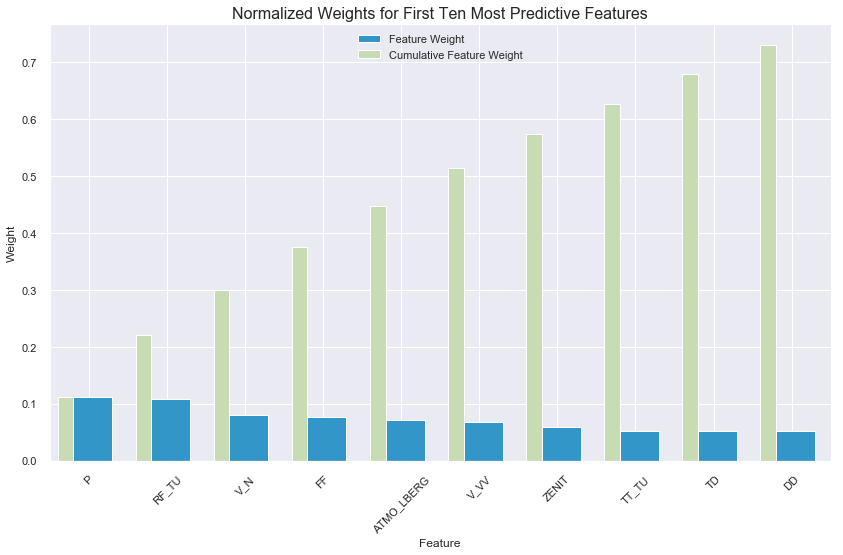

In [120]:
# Extract the feature importances
importances = rf.feature_importances_

# Plot
feature_plot(importances, x_train, y_train)

Recall Baseline: 1.0 Test: 0.54 Train: 1.0
Precision Baseline: 0.12 Test: 0.81 Train: 1.0
Roc Baseline: 0.5 Test: 0.95 Train: 1.0


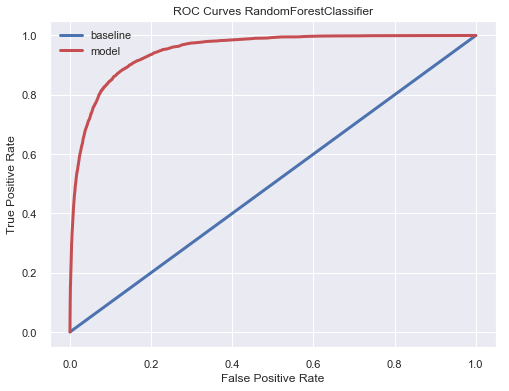

In [121]:
# Make probability predictions
train_probs = rf.predict_proba(x_train)[:, 1]
probs = rf.predict_proba(x_test)[:, 1]

train_predictions = rf.predict(x_train)
predictions = rf.predict(x_test)

train_labels = y_train.copy()
test_labels = y_test.copy()

evaluate_model(predictions, probs, train_predictions, train_probs,'RandomForestClassifier', 'Images/Prec_RFR.png')

In [122]:
## ROC score
roc_auc_score(y_test, probs)

0.9497270240205457

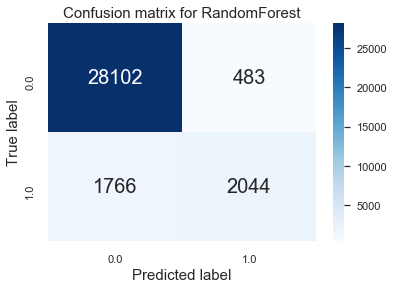

In [123]:
confusion_matrix = pd.crosstab(y_test, y_pred_rf, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,annot_kws={'size': 20},fmt='g',cmap='Blues');

plt.ylabel('True label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)
plt.title('Confusion matrix for RandomForest', fontsize=15);
plt.savefig('Images/Prec_RFR_matrix.png',dpi=500)

In [124]:
(28102+2044)/(28102+2044+1766+483)

0.9305757061274889

## RandomForest Classifier with RandomizedGridSearch Cross-Validation

In [ ]:
# TODO!
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 1000).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 0)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=10)

# Fit
t = time.time()

rs.fit(x_train, y_train)

best_model = rs.best_estimator_
train_rf_predictions = best_model.predict(x_train)

train_rf_probs = best_model.predict_proba(x_train)[:, 1]

rf_predictions = best_model.predict(x_test)
rf_probs = best_model.predict_proba(x_test)[:, 1]

n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

elapsed = time.time() - t
elapsed

In [ ]:
# Random Forest with best parameters

y = df_imputed.TARGET
x = df_imputed.drop(columns=['TARGET'])

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=10)

# Run random forest classifier
t = time.time()
random_forest = RandomForestClassifier(n_estimators=161,min_samples_split=5,max_leaf_nodes=41, max_features=0.5, max_depth=7,random_state = 10, verbose = 1, n_jobs = -1)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
elapsed = time.time() - t
elapsed

## Cross Valiadation

In [ ]:
# TODO!
def model_cross_valid(X,Y):
    seed = 7
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    def bulid_model(model_name):
        model = model_name()
        return model
    scoring = 'neg_mean_squared_error'
    # + random fest boost lstm gbdt

    for model_name in [LinearRegression,ElasticNet]:
    #for model_name in [LinearRegression,Ridge,Lasso,ElasticNet,KNeighborsRegressor,DecisionTreeRegressor,SVR,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor]:
        model = bulid_model(model_name)
        results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        print(model_name,results.mean()) 